In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [7]:
# pythonda path kullanımı :
# ./ ifadesi,kod dosyasınızın çalıştığı/açıldığı klasör anlamına gelir.
# ../ ifadesi ise bir üst klasör anlamına gelir.
# örneğin "c:\\users\\kullanıcı" olarak arartırsınız
# r "c:\\users\\kullanıcı" şeklinde verebilirsiniz
# Ancak,programlama dillerinde özellikle python,da ifadesi ile o an aktif olarak çalıştığınız klasör anlamına gelir.
# her seferinde path sıfırdan yazmasınız.
my_img = cv2.imread('../Assets/aslan.jpg')
print(type(my_img)) # <class 'numpy.ndarray'>

<class 'numpy.ndarray'>


In [9]:
print(my_img.shape) 
print(f"Görüntünün yüksekliği(satır sayısı) : {my_img.shape[0]}")
print(f"Görüntünün genişliği(sütun sayısı) : {my_img.shape[1]}")
print(f"Görüntünün renk kanalı sayısı : {my_img.shape[2]}")

(960, 1280, 3)
Görüntünün yüksekliği(satır sayısı) : 960
Görüntünün genişliği(sütun sayısı) : 1280
Görüntünün renk kanalı sayısı : 3


In [10]:
# bgr olarak renkli bir şekilde okunan görüntüyü, gray seviyesine yani tek kanallı yapıyoruz.
my_img_gray = cv2.cvtColor(my_img,cv2.COLOR_BGR2GRAY)
print(my_img_gray.shape)


(960, 1280)


In [21]:
# Thresholding siyah-beyaz yani gri seviyede tek kanallı görüntülerin kenar tespiti,nesne tanıma,nesne ayırt ettme,tıbbi alanda
# hücre görüntülerinin maskelenmesi (ground truth mask images) gibi alanlarda kullanılan klasik bir yöntemdir.

# Bir eşik değeri şecilir, siyah-beyaz gri görüntünün her bir pikseli bu eşik değeriyle karşılaştırılır. Eğer ilgili piksel değeri
# bu eşik değerinden düşüke yeni bir piksel değeri alır,yüksekse yine yeni bir piksel değeri alır.Farklı eşikleme yöntemlerinin olmasının
# nedeni , bu yeni piksel değerinin kaç olacağıyla ilgilidir.

# Binary Thresholding : görüntüde yer alan herhangi bir piksel seçilen eşşik değerinden  küçükse (thresh value) siyah rengine dönşür
# yani 0 değerini alır, büyük veya eşitse beya rengine dönüşür yani 255 olur.Binarynin anlamı, oluşucak yeni görüntüde ya 0 ya da 255
# değeri alamsıdır, yani görüntüde siyah ve beyazdan başak bir renk ve 0 ile 255ten başka bir piksel değeri yoktur.

_,my_binary_thresh_img = cv2.threshold(my_img_gray, thresh=125,maxval=255,type=cv2.THRESH_BINARY)

In [22]:
# Eşikleme yönteminni sayısal olarak ispatı
print(f"Orijinal Piksel Değeri : {my_img_gray[500,900]}")
print(f"Binary Thresholding Sonrası Piksel Değeri : {my_binary_thresh_img[500,900]}")

Orijinal Piksel Değeri : 105
Binary Thresholding Sonrası Piksel Değeri : 0


Text(0.5, 1.0, 'Binary Thresh Image')

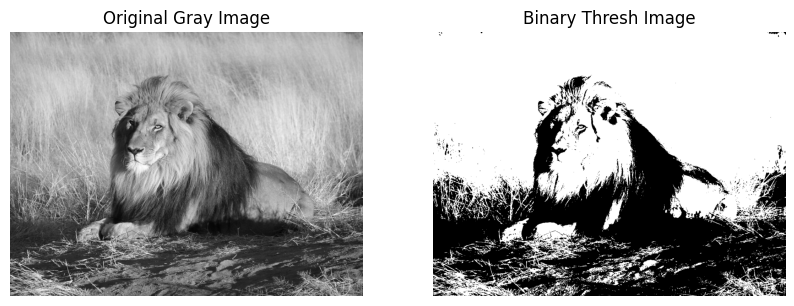

In [23]:
Fig =plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.imshow(my_img_gray,cmap='gray')
plt.axis('off')
plt.title('Original Gray Image')

plt.subplot(1,2,2)
plt.imshow(my_binary_thresh_img,cmap='gray')
plt.axis('off')
plt.title('Binary Thresh Image')



In [24]:
_,my_binary_inv_thresh_img = cv2.threshold(my_img_gray, thresh=125,maxval=255,type=cv2.THRESH_BINARY_INV)

In [25]:
print(f"Orijinal Piksel Değeri : {my_img_gray[500,900]}")
print(f"Binary Thresholding Sonrası Piksel Değeri : {my_binary_thresh_img[500,900]}")
print(f"Binary  İnverse Thresholding Sonrası Piksel Değeri : {my_binary_inv_thresh_img[500,900]}")

Orijinal Piksel Değeri : 105
Binary Thresholding Sonrası Piksel Değeri : 0
Binary  İnverse Thresholding Sonrası Piksel Değeri : 255


Text(0.5, 1.0, 'Binary  Inverse Thresh Image')

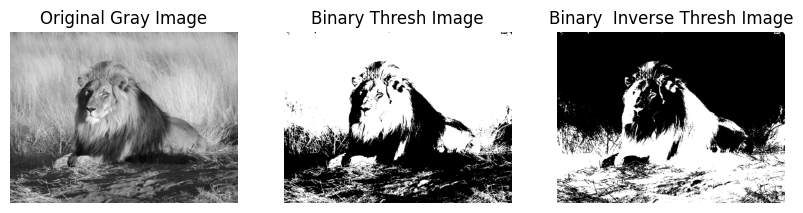

In [26]:
Fig =plt.figure(figsize=(10,7))

plt.subplot(1,3,1)
plt.imshow(my_img_gray,cmap='gray')
plt.axis('off')
plt.title('Original Gray Image')

plt.subplot(1,3,2)
plt.imshow(my_binary_thresh_img,cmap='gray')
plt.axis('off')
plt.title('Binary Thresh Image')

plt.subplot(1,3,3)
plt.imshow(my_binary_inv_thresh_img,cmap='gray')
plt.axis('off')
plt.title('Binary  Inverse Thresh Image')



In [ ]:
# TRUNC THRESHOLDING ilgili piksel değeri eşik değerinden büyükse,eşik değerine eşitler, eşik değerinden küçükse olduğu gibi bırakır.
#kullanım amacı, görüntüdeki yüksek değere sahip piksellerin devre dışı bırakılmasıdır/kırpılmasıdır.

_, my_trunc_thresh_img = cv2.threshold(my_img_gray,thresh=125,maxval=255,type=cv2.THRESH_TRUNC)

In [28]:
print(f"Orijinal Piksel Değeri : {my_img_gray[500,900]}")
print(f"Binary Thresholding Sonrası  Değeri : {my_binary_thresh_img[500,900]}")
print(f"Binary İnverse Thresholding  Değeri : {my_binary_inv_thresh_img[500,900]}")
print(f"Trunc Thresholding  Değeri : {my_trunc_thresh_img[500,900]}")

Orijinal Piksel Değeri : 105
Binary Thresholding Sonrası  Değeri : 0
Binary İnverse Thresholding  Değeri : 255
Trunc Thresholding  Değeri : 105


Text(0.5, 1.0, ' TRUNC Thresh Image')

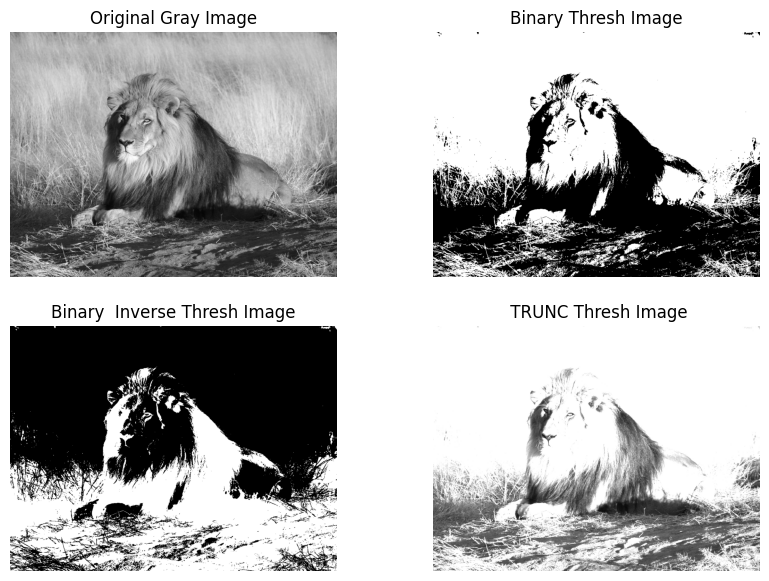

In [29]:
Fig =plt.figure(figsize=(10,7))

plt.subplot(2,2,1)
plt.imshow(my_img_gray,cmap='gray')
plt.axis('off')
plt.title('Original Gray Image')

plt.subplot(2,2,2)
plt.imshow(my_binary_thresh_img,cmap='gray')
plt.axis('off')
plt.title('Binary Thresh Image')

plt.subplot(2,2,3)
plt.imshow(my_binary_inv_thresh_img,cmap='gray')
plt.axis('off')
plt.title('Binary  Inverse Thresh Image')

plt.subplot(2,2,4)
plt.imshow(my_trunc_thresh_img,cmap='gray')
plt.axis('off')
plt.title(' TRUNC Thresh Image')




In [ ]:
# TOZERO THRESHOLDING ilgili piksel değeri eşik değerinden büyükse, olduğu gibi bırakır, eşik değerinden küçükse 0 yapar.
# kullanım amacı, görüntüdeki düşük değere sahip piksellerin devre dış
_, my_tozero_img = cv2.threshold(my_img_gray,thresh=125,maxval=255,type=cv2.THRESH_TOZERO)

In [ ]:
print(f"Orijinal Piksel Değeri : {my_img_gray[500,900]}")
print(f"Binary Thresholding Sonrası  Değeri : {my_binary_thresh_img[500,900]}")
print(f"Binary İnverse Thresholding  Değeri : {my_binary_inv_thresh_img[500,900]}")
print(f"Trunc Thresholding  Değeri : {my_trunc_thresh_img[500,900]}")
print(f"TOZERO  Değeri : {my_tozero_img[500,900]}")

Orijinal Piksel Değeri : 105
Binary Thresholding Sonrası  Değeri : 0
Binary İnverse Thresholding  Değeri : 255
Trunc Thresholding  Değeri : 105
Trunc TOZERO  Değeri : 0


Text(0.5, 1.0, ' TOZERO THRESH Image')

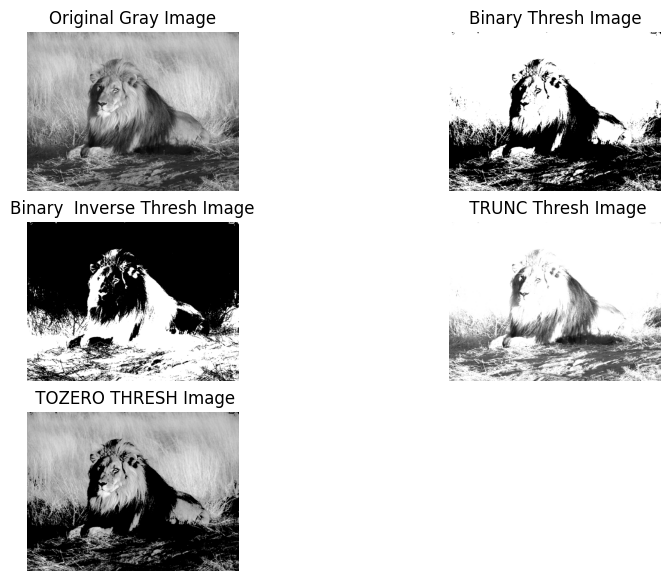

In [38]:
Fig =plt.figure(figsize=(10,7))

plt.subplot(3,2,1)
plt.imshow(my_img_gray,cmap='gray')
plt.axis('off')
plt.title('Original Gray Image')

plt.subplot(3,2,2)
plt.imshow(my_binary_thresh_img,cmap='gray')
plt.axis('off')
plt.title('Binary Thresh Image')

plt.subplot(3,2,3)
plt.imshow(my_binary_inv_thresh_img,cmap='gray')
plt.axis('off')
plt.title('Binary  Inverse Thresh Image')

plt.subplot(3,2,4)
plt.imshow(my_trunc_thresh_img,cmap='gray')
plt.axis('off')
plt.title(' TRUNC Thresh Image')

plt.subplot(3,2,5)
plt.imshow(my_tozero_img,cmap='gray')
plt.axis('off')
plt.title(' TOZERO THRESH Image')

In [41]:
_, my_tozero_inv_img = cv2.threshold(my_img_gray,thresh=125,maxval=255,type=cv2.THRESH_TOZERO_INV)

In [44]:
print(f"Orijinal Piksel Değeri : {my_img_gray[500,900]}")
print(f"Binary Thresholding Sonrası  Değeri : {my_binary_thresh_img[500,900]}")
print(f"Binary İnverse Thresholding  Değeri : {my_binary_inv_thresh_img[500,900]}")
print(f"Trunc Thresholding  Değeri : {my_trunc_thresh_img[500,900]}")
print(f"Tozero  Değeri : {my_tozero_img[500,900]}")
print(f"Tozero INV Değeri : {my_tozero_inv_img[500,900]}")

Orijinal Piksel Değeri : 105
Binary Thresholding Sonrası  Değeri : 0
Binary İnverse Thresholding  Değeri : 255
Trunc Thresholding  Değeri : 105
Tozero  Değeri : 0
Tozero INV Değeri : 105


Text(0.5, 1.0, ' Tozero Inv Thresh Image')

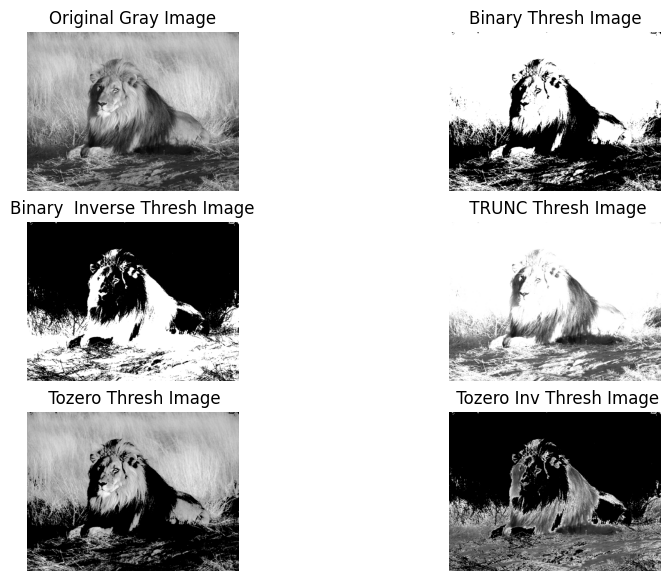

In [ ]:
Fig =plt.figure(figsize=(10,7))

plt.subplot(3,2,1)
plt.imshow(my_img_gray,cmap='gray')
plt.axis('off')
plt.title('Original Gray Image')

plt.subplot(3,2,2)
plt.imshow(my_binary_thresh_img,cmap='gray')
plt.axis('off')
plt.title('Binary Thresh Image')

plt.subplot(3,2,3)
plt.imshow(my_binary_inv_thresh_img,cmap='gray')
plt.axis('off')
plt.title('Binary  Inverse Thresh Image')

plt.subplot(3,2,4)
plt.imshow(my_trunc_thresh_img,cmap='gray')
plt.axis('off')
plt.title(' TRUNC Thresh Image')

plt.subplot(3,2,5)
plt.imshow(my_tozero_img,cmap='gray')
plt.axis('off')
plt.title(' Tozero Thresh Image')

plt.subplot(3,2,6)
plt.imshow(my_tozero_inv_img,cmap='gray')
plt.axis('off')
plt.title(' Tozero Inv Thresh Image')

plt.tight_layout()
plt.savefig('../Assets/multi_thresh_techniques.png',dpi=300)

In [49]:
# Resize: satır x sütun bazında büyütme/küçültme işlemi

#cv2 görüntüyü resize ederken kullanılan formül

# cv2.resize(original_image,(new_width,new_height),cv2.INTER_LANCZOS4)

# 2 adet resize formülü, bu formül tek parametre alıcak o da görüntüyü saklayacak
# bir fonk büyütmek için öbürü ise küçültme için
# büyütme ve küçültme için de olsa görüntünün yükseklil ve genişliğinin %25 oranında büyütecek ya da küçültücek
# bu yeni görüntüyü de geriye döndürcek, siz de bunu çalıştırırken bir değişkene atıcaksınız.
# önce .shape ile orijinal görüntüyü ve büyük/küçük görüntüyü boyut olarak kontrol ediceksiniz.

def smaller_img(image):
    width  = int(image.shape[1] - int(image.shape[1]*0.25))
    height = int(image.shape[0] - int(image.shape[0]*0.25))
    result = cv2.resize(image,(width,height),cv2.INTER_LANCZOS4)
    print(f"Küçültülmüş Boyutu:{result.shape}")
    return result

def larger_img(image):
    width  = int(image.shape[1] + int(image.shape[1]*0.25))
    height = int(image.shape[0] + int(image.shape[0]*0.25))
    result = cv2.resize(image,(width,height),cv2.INTER_LANCZOS4)
    print(f"Büyütülmüş Boyutu:{result.shape}")
    return result



In [50]:
my_larger_img = larger_img(my_img_gray)
my_smaller_img = smaller_img(my_img_gray) 

print(f"Orijinal  Boyutu : {my_img_gray.shape}")
print(f"Büyütülmüş  Boyutu : {my_larger_img.shape}")
print(f"Küçültülmüş  Boyutu : {my_smaller_img.shape}")

Büyütülmüş Boyutu:(1200, 1600)
Küçültülmüş Boyutu:(720, 960)
Orijinal  Boyutu : (960, 1280)
Büyütülmüş  Boyutu : (1200, 1600)
Küçültülmüş  Boyutu : (720, 960)
